## Importing the data into my notebook

Much of the code below is found in the Exploration.ipynb file in the repository

In [80]:
! ls preproc

PreprocessedPerceptionDataSubject1.h5
PreprocessedPerceptionDataSubject1.h5.zip
PreprocessedPerceptionDataSubject2.h5
PreprocessedPerceptionDataSubject3.h5
PreprocessedSleepDataSubject1.h5
PreprocessedSleepDataSubject2.h5
PreprocessedSleepDataSubject3.h5
propsSubject1.h5
propsSubject2.h5
propsSubject3.h5


In [81]:
import h5py
import os

In [82]:
root = "preproc"
perc = os.path.join(root, "PreprocessedPerceptionDataSubject1.h5")
sleep = os.path.join(root, "PreprocessedSleepDataSubject1.h5")
props = os.path.join(root, "propsSubject1.h5")

In [83]:
dfile = h5py.File(sleep, "r")
dfile.keys()

<KeysViewHDF5 ['data', 'metaData', 'metaDefinition']>

In [84]:
for key in dfile.keys():
    dset = dfile[key]
    try:
        print(key, dset.shape, dset.dtype, dset[0], end="\n\n")
    except:
        print(key, dset, type(key), end="\n\n")

data (235, 4039) float64 [-1.23439404 -0.48702744  1.19918902 ...  1.          1.
  1.        ]

metaData <HDF5 group "/metaData" (43 members)> <class 'str'>

metaDefinition (43,) |S33 b'0 = not voxelData, 1 = voxelData'



In [85]:
tfile = h5py.File(os.path.join(root, "PreprocessedSleepDataSubject2.h5"), "r")
tfile["data"].shape

(198, 3981)

In [86]:
data = dfile["data"]
mdata = dfile["metaData"]
mdef = dfile["metaDefinition"]
for i, key in enumerate(mdata):
    print(i, key, mdata[key].shape, " -- ",mdef[i])

0 EEG_sleep_score (1, 4039)  --  b'0 = not voxelData, 1 = voxelData'
1 FFA (1, 4039)  --  b'Value = X coordinate'
2 HVC (1, 4039)  --  b'Value = Y coordinate'
3 LOC (1, 4039)  --  b'Value = Z coordinate'
4 LVC (1, 4039)  --  b'0 = not FFA voxel, 1 = FFA voxel'
5 PPA (1, 4039)  --  b'0 = not HVC voxel, 1 = HVC voxel'
6 Synset_building_ID_02913152 (1, 4039)  --  b'0 = not LOC voxel, 1 = LOC voxel'
7 Synset_chair_ID_03001627 (1, 4039)  --  b'0 = not LVC voxel, 1 = LVC voxel'
8 Synset_character_ID_06818970 (1, 4039)  --  b'0 = not PPA voxel, 1 = PPA voxel'
9 Synset_clothing_ID_03051540 (1, 4039)  --  b'0 = not V1 voxel, 1 = V1 voxel'
10 Synset_code_ID_06355894 (1, 4039)  --  b'0 = not V2 voxel, 1 = V2 voxel'
11 Synset_cognition_ID_00023271 (1, 4039)  --  b'0 = not V3 voxel, 1 = V3 voxel'
12 Synset_external_body_part_ID_05225090 (1, 4039)  --  b'0 = not label, 1 = label'
13 Synset_geographical_area_ID_08574314 (1, 4039)  --  b'0 = absent, 1 = present'
14 Synset_girl_ID_10129825 (1, 4039)  -

In [87]:
pfile = h5py.File(props, "r")
pfile.keys()

<KeysViewHDF5 ['roiMask', 'roiNames', 'synsetNames', 'synsetPairs', 'xyz']>

In [88]:

for key in pfile.keys():
    dset = pfile[key]
    try:
        print(key, dset.shape, dset.dtype, dset[0], end="\n\n")
    except:
        print(key, dset, type(key), end="\n\n")

roiMask (8, 4010) float64 [0. 0. 0. ... 0. 0. 0.]

roiNames (8,) |S4 b'FFA'

synsetNames (26,) |S38 b'Synset_male_ID_09624168'

synsetPairs (201, 2) |S38 [b'Synset_character_ID_06818970' b'Synset_male_ID_09624168']

xyz (3, 4010) float64 [-67.5 -67.5 -67.5 ...  64.5  64.5  64.5]



In [89]:
rmask = pfile["roiMask"]
rnames = pfile["roiNames"]
xyz = pfile["xyz"]

print(rmask[0, :].sum(), rnames[0])
print(xyz[:, 2])

for region in range(len(rnames)):
    numel = rmask[region].sum() # number of "1" elements in the roi masks
    numel_d = sum(mdata[rnames[region]][0]) # number of "1" elements in corresponding mdata masks
    print(rnames[region], " -- ", numel, " -- ", numel_d) # should both be the same

537.0 b'FFA'
[-67.5 -43.5  -4.5]
b'FFA'  --  537.0  --  537.0
b'HVC'  --  1956.0  --  1956.0
b'LOC'  --  523.0  --  523.0
b'LVC'  --  2054.0  --  2054.0
b'PPA'  --  353.0  --  353.0
b'V1'  --  885.0  --  885.0
b'V2'  --  901.0  --  901.0
b'V3'  --  728.0  --  728.0


In [90]:
print(data.shape)
ffa_mask = rmask[0].astype(bool)
print(ffa_mask.shape)

(235, 4039)
(4010,)


In [91]:
import numpy as np
import pandas as pd

In [92]:
dfile = h5py.File(sleep, "r") #data file

data = dfile["data"]
mdata = dfile["metaData"]

#convert from h5 to a dictionary of np arrays, which pandas understands
mdata_dict_arr = {key: np.squeeze(np.array(val)) for key, val in mdata.items()}

meta_df = pd.DataFrame.from_dict(mdata_dict_arr)
data_df = np.array(data)

print(meta_df.shape)
meta_df.head()

(4039, 43)


,EEG_sleep_score,FFA,HVC,LOC,LVC,PPA,Synset_building_ID_02913152,Synset_chair_ID_03001627,Synset_character_ID_06818970,Synset_clothing_ID_03051540,...,V2,V3,X,Y,Z,design,label,sample_number,session_number,voxelData
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,-1.5,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,1.5,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-4.5,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-1.5,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-64.5,-52.5,-4.5,0.0,0.0,0.0,0.0,1.0


In [93]:
print(data_df.shape)

(235, 4039)


In [94]:
data_df

array([[-1.23439404e+00, -4.87027437e-01,  1.19918902e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.63373625e+00,  5.24539088e+00, -1.69498203e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 4.01640746e-01,  3.25192376e+00, -1.38049469e+00, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       ...,
       [-2.85550630e+00, -2.69055550e+00, -1.17711014e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.33000000e+02],
       [-1.89436357e-01, -1.59084747e+00,  2.13385080e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.34000000e+02],
       [-1.89219074e+00, -2.45376516e+00,  3.57550935e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.35000000e+02]])

In [95]:
import utils

masks, data =  utils.load_data(1)

In [96]:
masks.head()

,EEG_sleep_score,FFA,HVC,LOC,LVC,PPA,Synset_building_ID_02913152,Synset_chair_ID_03001627,Synset_character_ID_06818970,Synset_clothing_ID_03051540,...,V2,V3,X,Y,Z,design,label,sample_number,session_number,voxelData
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,-1.5,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-46.5,1.5,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-4.5,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-67.5,-43.5,-1.5,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-64.5,-52.5,-4.5,0.0,0.0,0.0,0.0,1.0


In [97]:
data

array([[-1.23439404e+00, -4.87027437e-01,  1.19918902e+00, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [ 1.63373625e+00,  5.24539088e+00, -1.69498203e+00, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [ 4.01640746e-01,  3.25192376e+00, -1.38049469e+00, ...,
         1.00000000e+00,  1.00000000e+00,  3.00000000e+00],
       ...,
       [-2.85550630e+00, -2.69055550e+00, -1.17711014e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.33000000e+02],
       [-1.89436357e-01, -1.59084747e+00,  2.13385080e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.34000000e+02],
       [-1.89219074e+00, -2.45376516e+00,  3.57550935e+00, ...,
         1.00000000e+00,  2.60000000e+01,  2.35000000e+02]])

In [98]:
print(f"data shape: {data.shape}")

data shape: (235, 4039)


In [99]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
import time

from sklearn.model_selection import train_test_split
from utils import load_data

In [100]:
print(masks.shape, data.shape)

(4039, 43) (235, 4039)


# Below is the code for creating the SVM. 

Below is the code for running the SVM Model. The sklearn library was used for a lot to allow us to print the results of our model. The library sklearn.metrics was used to print the recall, precision, F1-score, and confusion matries for the SVM model. The library sklearn.svm allowed us to acually make our SVM using the SVC portion of the library.

#### Importing the DataHandler function to bring the data into the notebook under a variable name.

In [101]:
from utils import load_data, DataHandler
from plotting import plot_confusion_matrix, classification_report

In [102]:
datahandler = DataHandler(masks, data, test_size=0.2)

# initialize the training and testing feature vectors
trainx = datahandler.get_feature(["FFA", "HVC", "LOC", "LVC", "PPA", "V1", "V2", "V3"], "train")
testx = datahandler.get_feature(["FFA", "HVC", "LOC", "LVC", "PPA", "V1", "V2", "V3"], "test")


#### Below is the code for creating and training the SVM model
The SVM model takes into account all of the features and all of the classes (26 words here because we chose to train with Subject 1). Because we are training with all of the variables the SVM Model takes a long time to run. Prior to this code using MultiOutputClassifier, the SVM was run individually with muliple classes, and an accuracy score was found to be 0.94 or 94% accurate. However, this code was ommitted in the final notebook because it was unnecessarily lengthy, and it does the same thing as the code below.

In [111]:
# Importing the MultiOutputClassifier which allows our data to be condensed better
from sklearn.multioutput import MultiOutputClassifier

# Initializing the train vectors containing the classes
start = time.time()
trainy = datahandler.get_labels()

# Initializaing temporary vectors that can be changed easily if needed
tmp_vectors = trainx
tmp_labels = trainy

# This allows us to use the the best parameters possible
param_grid = {'estimator__C': [1e3, 5e3, 1e4, 5e4, 1e5],
              'estimator__gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
              'estimator__kernel': ['linear','rbf']}

# Creating the SVM using the best possible classifiers and parameters
clf = MultiOutputClassifier(SVC(class_weight='balanced'))

clf = GridSearchCV(clf, param_grid)

clf = clf.fit(tmp_vectors, tmp_labels)

end = time.time()
print("Runtime",end - start)
print(clf.best_params_)


Runtime 706.0300271511078
{'estimator__C': 1000.0, 'estimator__gamma': 0.0005, 'estimator__kernel': 'rbf'}


### Below is the code for testing our SVM.
The testing was done using the testing split of our dataset and then by printing the classification labels (recall, precision, and F1 score) and plotting confusion matrices that show the accuracy or result for each class.

/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/samtadian/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1327: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                    precision    recall  f1-score   support

          building       0.00      0.00      0.00         3
             chair       0.00      0.00      0.00         5
         character       0.00      0.00      0.00         7
          clothing       0.00      0.00      0.00         2
              code       0.00      0.00      0.00         3
         cognition       0.00      0.00      0.00         1
external_body_part       0.00      0.00      0.00         5
 geographical_area       0.00      0.00      0.00         1
              girl       0.00      0.00      0.00         2
             group       0.00      0.00      0.00         2
      illustration       0.00      0.00      0.00         0
         implement       0.00      0.00      0.00         0
              line       0.00      0.00      0.00         0
              male       0.57      1.00      0.73        27
          material       0.00      0.00      0.00         3
    natural_object       0.00      0.00

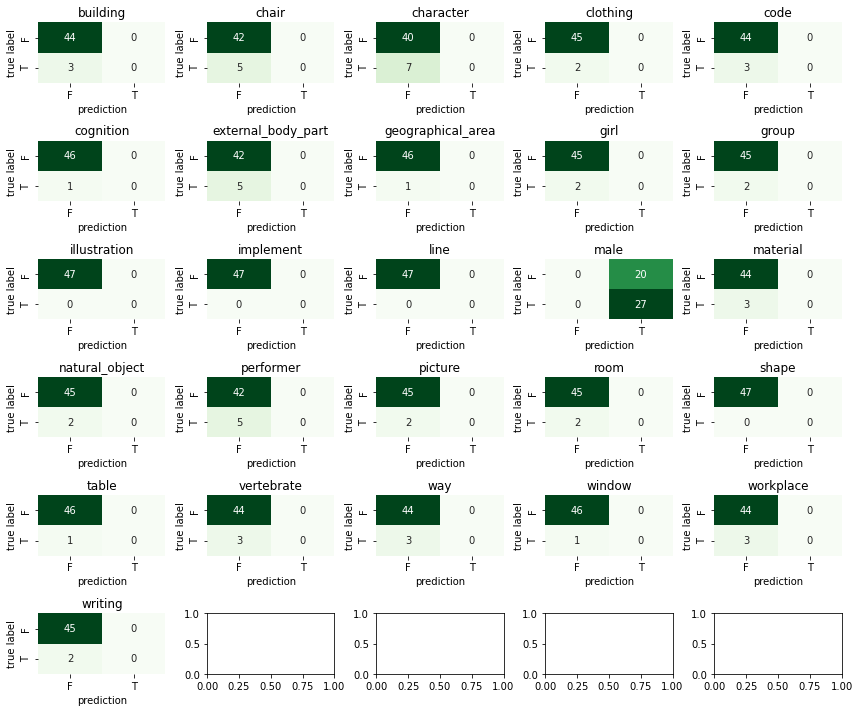

In [117]:

testy = datahandler.get_labels(split_set ='test')
predict_vectors = testx
words = datahandler.get_label_names()

pred_labels = clf.predict(predict_vectors)
    
print(classification_report(testy, pred_labels, target_names = words))
    
fig = plot_confusion_matrix(testy, pred_labels, words)
fig.savefig("SVM_model.png")